#### Jueves 8 de mayo de 2025

## Árbol de Decisión CART. ¿Aprobaré el examen?

In [21]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [ ]:
#Dataset
data = {
    'Estudiante': ['Ana', 'Luis', 'Carlos'],
    'Estudio': ['Sí', 'No', 'Sí'],
    'Dormido': ['Sí', 'No', 'No'],
    'Cafe': ['No', 'Sí', 'Sí'],
    'Aprobo': ['Sí', 'No', 'Sí']
}

df = pd.DataFrame(data)
print("Dataset original: ")
print(df)

Dataset original: 


,Estudiante,Estudio,Dormido,Cafe,Aprobo
0,Ana,Sí,Sí,No,Sí
1,Luis,No,No,Sí,No
2,Carlos,Sí,No,Sí,Sí


In [ ]:
# Cambiar datos categóricos a numéricos
label_encoders =  {}
df_encoded = df.copy()

for column in df.columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df[column])
    label_encoders[column] = le
print("\nDataset codificado:")
print(df_encoded)


Dataset codificado:


,Estudiante,Estudio,Dormido,Cafe,Aprobo
0,0,1,1,0,1
1,2,0,0,1,0
2,1,1,0,1,1


In [24]:
#Dividir datos de entrenamiento y prueba
X = df_encoded.drop(['Estudiante', 'Aprobo'], axis=1)
y = df_encoded['Aprobo']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDatos de entrenamiento: \n")
print(X_train)
print("\nDatos de prueba: \n")
print(X_test)


Datos de entrenamiento: 

   Estudio  Dormido  Cafe
1        0        0     1
2        1        0     1

Datos de prueba: 

   Estudio  Dormido  Cafe
0        1        1     0


In [25]:
# Creación y Entrenamiento del modelo
modelo = DecisionTreeClassifier(
    criterion = 'gini',
    random_state = 42
)
modelo.fit(X, y)

print("Profundidad real del árbol:", modelo.get_depth())
print("Número de hojas:", modelo.get_n_leaves())


Profundidad real del árbol: 1
Número de hojas: 2


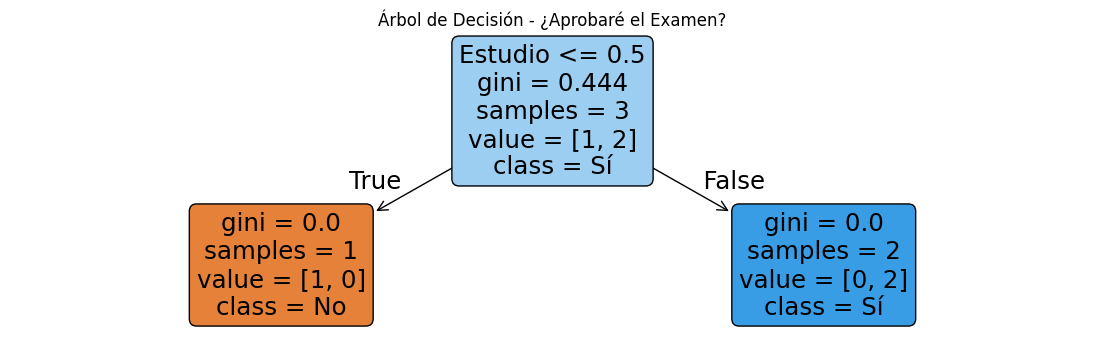

In [26]:
plt.figure(figsize=(14, 4))
plot_tree(
    modelo, 
    feature_names = X.columns,
    class_names=['No', 'Sí'], 
    filled=True,
    rounded=True,
    impurity=True
)
plt.title("Árbol de Decisión - ¿Aprobaré el Examen?")
plt.show()

In [28]:
# Hacer predicciones
print("PREDICCIÓN - ¿APROBARÉ EL EXAMEN? \n")

# Ejemplo de predicción
nuevos_datos = {
    'Estudio': 1,
    'Dormido': 1,
    'Cafe': 0
}

nuevo_df = pd.DataFrame([nuevos_datos])
print("Datos de predicción: \n")
for atributo, valor in nuevos_datos.items():
    print(f"{atributo}: {valor}")

prediccion = modelo.predict(nuevo_df)

print("\nPredicción para el nuevo dato:")
if prediccion[0] == 1:
    print("Aprobó el examen")
else:
    print("Reprobó el examen")

PREDICCIÓN - ¿APROBARÉ EL EXAMEN? 

Datos de predicción: 

Estudio: 1
Dormido: 1
Cafe: 0

Predicción para el nuevo dato:
Aprobó el examen


In [30]:
# Importancia de cada atributo

# feature_importances_: muestra la importancia de cada característica en el modelo. 
# Cuanto mayor sea el valor, más relevante es esa característica para las decisiones del árbol de decisión.

importancias = modelo.feature_importances_ 

print("\nImportancia de cada atributo\n")
for atributo, importancia in zip(X.columns, importancias):
    print(f"{atributo} -> {importancia}")


Importancia de cada atributo

Estudio -> 1.0
Dormido -> 0.0
Cafe -> 0.0


#### ¿Cuál es el Gini inicial? ,Dibuja el árbol hasta el segundo nivel.

In [19]:
# De acuerdo al árbol mostrado, el gini inicial es de 0.444